<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

## *Data Science Unit 4 Sprint 4*

# Sprint Challenge
### RNNs, CNNs, GANS, and AutoML

In this Sprint Challenge, you'll explore some of the cutting edge of Data Science. *Caution* - these approaches can be pretty heavy computationally. All problems are designed to completed with 5-10 minutes of run time on most machines. If you approach takes longer, please double check your work. 

## Part 1 - RNNs

Use an RNN to fit a classification model on tweets to distinguish from tweets from any two accounts. The following code sample illustrates how to access data from an account (no API auth needed, uses [twitterscraper](https://github.com/taspinar/twitterscraper): 

In [1]:
!pip install twitterscraper

  Stored in directory: /root/.cache/pip/wheels/45/50/9b/70128bca07e2bf8b5ed3f504002e9e74a6eaa5e756341b6931
Successfully built twitterscraper


In [2]:
from twitterscraper import query_tweets

austen_tweets = query_tweets('from:austen',1000)
len(austen_tweets)

INFO: queries: ['from:austen since:2006-03-21 until:2006-11-16', 'from:austen since:2006-11-16 until:2007-07-14', 'from:austen since:2007-07-14 until:2008-03-10', 'from:austen since:2008-03-10 until:2008-11-06', 'from:austen since:2008-11-06 until:2009-07-04', 'from:austen since:2009-07-04 until:2010-03-01', 'from:austen since:2010-03-01 until:2010-10-27', 'from:austen since:2010-10-27 until:2011-06-25', 'from:austen since:2011-06-25 until:2012-02-20', 'from:austen since:2012-02-20 until:2012-10-17', 'from:austen since:2012-10-17 until:2013-06-14', 'from:austen since:2013-06-14 until:2014-02-10', 'from:austen since:2014-02-10 until:2014-10-08', 'from:austen since:2014-10-08 until:2015-06-05', 'from:austen since:2015-06-05 until:2016-01-31', 'from:austen since:2016-01-31 until:2016-09-28', 'from:austen since:2016-09-28 until:2017-05-26', 'from:austen since:2017-05-26 until:2018-01-21', 'from:austen since:2018-01-21 until:2018-09-18', 'from:austen since:2018-09-18 until:2019-05-17']
INFO

181

In [3]:
austen_tweets[0].text

'I love love love working with great people.pic.twitter.com/fCKOm6Vl'

Your Tasks:
* Select two twitter accounts to gather data from
* Use twitterscraper to get ~1,000 tweets from each account
* Encode the characters to a sequence of integers for the model
* Get the data into the appropriate shape/format, including labels and a train/test split
* Use Keras to fit a predictive model, classying tweets as being from one acount or the other
* Report your overall score and accuracy

For reference, the [Keras IMDB classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well as the RNN code we used in class.

Note - focus on getting a running model, not on making accuracy with extreme data size or epoch numbers. Fit a baseline model based on tweet text. Only revisit and push accuracy or incorporate additional features if you get everything else done!

In [4]:
elon_tweets = query_tweets('from:elonmusk', 1000)
len(elon_tweets)

INFO: queries: ['from:elonmusk since:2006-03-21 until:2006-11-16', 'from:elonmusk since:2006-11-16 until:2007-07-14', 'from:elonmusk since:2007-07-14 until:2008-03-10', 'from:elonmusk since:2008-03-10 until:2008-11-06', 'from:elonmusk since:2008-11-06 until:2009-07-04', 'from:elonmusk since:2009-07-04 until:2010-03-01', 'from:elonmusk since:2010-03-01 until:2010-10-27', 'from:elonmusk since:2010-10-27 until:2011-06-25', 'from:elonmusk since:2011-06-25 until:2012-02-20', 'from:elonmusk since:2012-02-20 until:2012-10-17', 'from:elonmusk since:2012-10-17 until:2013-06-14', 'from:elonmusk since:2013-06-14 until:2014-02-10', 'from:elonmusk since:2014-02-10 until:2014-10-08', 'from:elonmusk since:2014-10-08 until:2015-06-05', 'from:elonmusk since:2015-06-05 until:2016-01-31', 'from:elonmusk since:2016-01-31 until:2016-09-28', 'from:elonmusk since:2016-09-28 until:2017-05-26', 'from:elonmusk since:2017-05-26 until:2018-01-21', 'from:elonmusk since:2018-01-21 until:2018-09-18', 'from:elonmusk 

721

In [5]:
joe_tweets = query_tweets('from:joerogan', 1000)
len(joe_tweets)

INFO: queries: ['from:joerogan since:2006-03-21 until:2006-11-16', 'from:joerogan since:2006-11-16 until:2007-07-14', 'from:joerogan since:2007-07-14 until:2008-03-10', 'from:joerogan since:2008-03-10 until:2008-11-06', 'from:joerogan since:2008-11-06 until:2009-07-04', 'from:joerogan since:2009-07-04 until:2010-03-01', 'from:joerogan since:2010-03-01 until:2010-10-27', 'from:joerogan since:2010-10-27 until:2011-06-25', 'from:joerogan since:2011-06-25 until:2012-02-20', 'from:joerogan since:2012-02-20 until:2012-10-17', 'from:joerogan since:2012-10-17 until:2013-06-14', 'from:joerogan since:2013-06-14 until:2014-02-10', 'from:joerogan since:2014-02-10 until:2014-10-08', 'from:joerogan since:2014-10-08 until:2015-06-05', 'from:joerogan since:2015-06-05 until:2016-01-31', 'from:joerogan since:2016-01-31 until:2016-09-28', 'from:joerogan since:2016-09-28 until:2017-05-26', 'from:joerogan since:2017-05-26 until:2018-01-21', 'from:joerogan since:2018-01-21 until:2018-09-18', 'from:joerogan 

960

In [0]:
all_tweets = elon_tweets + joe_tweets

In [7]:
len(all_tweets)

1681

In [0]:
text = ''
for tweet in elon_tweets:
    text += tweet.text
for tweet in joe_tweets:
    text += tweet.text
    
tweet_list = list(set(text))
indice = dict((x, y) for x, y in enumerate(tweet_list))

In [0]:
elon_encoded = []
for tweet in elon_tweets:
    elon_encoded.append([indice[i] for i in tweet.text])

In [0]:
joe_encoded = []
for tweet in joe_tweets:
    joe_encoded.append([indice[i] for i in tweet.text])

In [12]:
len(elon_encoded)

721

In [13]:
len(joe_encoded)

960

In [0]:
import pandas as pd

In [0]:
elon_df = pd.DataFrame({'encoding' : [i for i in elon_encoded], 'label' : [1] * len(elon_tweets)})

In [0]:
joe_df = pd.DataFrame({'encoding' : [i for i in joe_encoded], 'label' : [0] * len(joe_tweets)})

In [0]:
df = pd.concat([elon_df, joe_df], ignore_index=True)

In [0]:
import numpy as np

In [0]:
X = sequence.pad_sequences(df.encoding, maxlen=280)
y = df.label

In [19]:
len(X)

1681

In [0]:
from sklearn.model_selection import train_test_split


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.25,
                                                   stratify=y)

In [0]:
!pip install tensorflow

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [23]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

Using TensorFlow backend.


In [0]:
from keras.layers.embeddings import Embedding

In [0]:
model = Sequential()
model.add(Embedding(15000, 128))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
model.fit(X_train, y_train,
          batch_size=32,
          epochs=15,
          validation_data=(X_test, y_test))

Train on 1260 samples, validate on 421 samples
Epoch 1/15
1260/1260 [==============================] - 12s 9ms/step - loss: 0.6569 - acc: 0.6183 - val_loss: 0.6067 - val_acc: 0.6603
Epoch 2/15
1260/1260 [==============================] - 10s 8ms/step - loss: 0.5385 - acc: 0.7325 - val_loss: 0.5807 - val_acc: 0.6793
Epoch 3/15
1260/1260 [==============================] - 10s 8ms/step - loss: 0.4702 - acc: 0.7881 - val_loss: 0.7899 - val_acc: 0.7102
Epoch 4/15
1260/1260 [==============================] - 10s 8ms/step - loss: 0.4948 - acc: 0.7833 - val_loss: 0.5139 - val_acc: 0.7743
Epoch 5/15
1260/1260 [==============================] - 10s 8ms/step - loss: 0.4800 - acc: 0.7960 - val_loss: 0.4489 - val_acc: 0.8124
Epoch 6/15
1260/1260 [==============================] - 10s 8ms/step - loss: 0.4298 - acc: 0.8254 - val_loss: 0.4596 - val_acc: 0.7720
Epoch 7/15
1260/1260 [==============================] - 10s 8ms/step - loss: 0.4097 - acc: 0.8357 - val_loss: 0.4364 - val_acc: 0.7957
Epoch 8/

In [60]:
scores = model.evaluate(X_test, y_test)

421/421 [==============================] - 1s 1ms/step


In [61]:
print("Test Accuracy: " % (scores[1]*100))

Test Accuracy: 78.38%


## Part 2 - CNNs
Time to play "find the frog!" Use Keras and ResNet50 to detect which of the following images contain frogs:

In [59]:
!pip install google_images_download

     |████████████████████████████████| 911kB 4.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/22/f3/7b/d1d7a18d9784458622ef3f9702c0bdbc179b431adde169c1a0
Successfully built google-images-download


In [69]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {'keywords': "animal pond", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)



Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1.Pondanimals.GIF
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 3.PKLS4116_inline.png
Image URL: https://get.pxhere.com/photo/water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Completed Image ====> 4.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Image URL: http://images.animalpicturesociety.com/images/5d/alligator_animal_on_pond.jpg
Completed Image ====> 5.alligator_animal_on_pond.jpg

Errors: 0



In [0]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [0]:
from keras.applications.resnet50 import ResNet50
import matplotlib.pyplot as plt

In [0]:
from keras.preprocessing import image

In [0]:
def detect_images(absolute_img_paths):
  model = ResNet50(weights='imagenet')
  
  fig, ax = plt.subplots(nrows=len(absolute_img_paths), figsize=(15*len(absolute_img_paths), 7))
  
  for i, absolute_img_paths in enumerate(absolute_img_paths):
    frogs = False
    y = image.load_img(absolute_img_paths, target_size=(224, 224))
    X = preprocess_input(np.expand_dims(image.img_to_array(y), axis=0))
    predictions = decode_predictions(model.predict(X), top=5)[0]
    
    if any(['frog' in prediction[1] for prediction in predictions]):
      frog= True
      
    if frogs:
      ax[i].set_title('Contians Frogs')
    else:
      ax[i].set_title('No Frogs')
      
    ax[i].imshow(y)
    ax[i].axis('off')
      
  plt.tight_layout()
  plt.show()
  
 

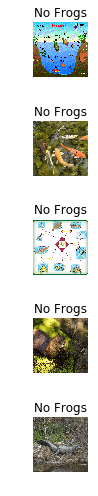

In [96]:
detect_images(absolute_image_paths[0]['animal pond'])

At the time of writing at least a few do, but since the internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is validly run ResNet50 on the input images - don't worry about tuning or improving the model. 

*Hint:* ResNet 50 doesn't just return "frog". The three labels it has for frogs are bullfrog, tree frog, and tailed frog.

Stretch goal - also check for fish.

## Part 3 - AutoML

Use [TPOT](https://epistasislab.github.io/tpot/) to fit a predictive model for the King County housing data, with `price` as the target output variable.

In [97]:
!pip install tpot

     |████████████████████████████████| 81kB 3.1MB/s 
     |████████████████████████████████| 942kB 8.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/22/ea/bf/dc7c8a2262025a0ab5da9ef02282c198be88902791ca0c6658
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built deap stopit


In [98]:
import pandas as pd

url = "https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv"
df = pd.read_csv(url)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
X = data.drop(columns=['id', 'date', 'price'])
y = data.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [0]:
from tpot import TPOTRegressor

In [102]:
model = TPOTRegressor(generations=4, population_size=15, verbosity=2)
model.fit(X_train, y_train)

Generation 1 - Current best internal CV score: -0.18748482393291935
Generation 2 - Current best internal CV score: -0.18744846173758878
Generation 3 - Current best internal CV score: -0.1861649629789358
Generation 4 - Current best internal CV score: -0.1861649629789358

Best pipeline: ElasticNetCV(ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=1.0, min_samples_leaf=4, min_samples_split=9, n_estimators=100), l1_ratio=1.0, tol=0.0001)


TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=4,
       max_eval_time_mins=5, max_time_mins=None, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=15,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=2,
       warm_start=False)

In [103]:
print(model.score(X_test, y_test))

-0.19466285030235464


As with previous questions, your goal is to run TPOT and successfully run and report error at the end. Also, in the interest of time, feel free to choose small `generation=1`and `population_size=10` parameters, so your pipeline runs efficiently. You will want to be able to iterate and test. 

*Hint:* You will have to drop and/or type coerce at least a few variables to get things working. It's fine to err on the side of dropping to get things running - as long as you still get a valid model with reasonable predictive power. 

## Part 4 - More... 

Answer the following questions, with a target audience of a fellow Data Scientist:
* What do you consider your strongest area as a Data Scientist? 
* What area of Data Science would you most like to learn more about and why? 
* Where do you think Data Science will be in 5 years? 

A few sentences per answer is fine. Only elaborate if time allows. Use markdown to format your answers.

Thank you for your hard, and congratulations!! You've learned a lot, and you should proudly call yourself a Data Scientist. 


**Question 1**: I consider my strongest area to probably be predictive modeling. I was always the best at comparing models and getting an optimal accuracy score. I also find NLP very interesting and am fond of statistics. I found just about everything in data science quite interesting.


**Question 2**: I would like to get more into deep learning. It just seems that this is going to be the future and i'm fascinated by what is going on with OpenAI and google DeepMind. For now I will be practicing for interviews and will learn whatever skills my job requires me to learn.

**Question 3**:I would hope that data science continues to grow and the field continues to increase in salary. it seems very likely that machine learning will continue to automate jobs